### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

   - Which variables are significant in predicting the price of a house, and

   - How well those variables describe the price of a house.

### Business Goal

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [3]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import reqquired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Data Understanding

In [6]:
# reading the dataset
housing_data = pd.read_csv('train.csv')
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
housing_data.shape

(1460, 81)

In [8]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
housing_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [10]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# checking for null values

housing_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
## Checking the percentage of missing values
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [13]:
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [14]:
housing_data['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [15]:
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        NA	No Pool
		

#### Treating the NaN Values

In [16]:
housing_data['PoolQC'] = housing_data['PoolQC'].fillna('No_Pool')

In [17]:
housing_data['MiscFeature'] = housing_data['MiscFeature'].fillna('None')
housing_data['Alley'] = housing_data['Alley'].fillna('No_Alley_Access')
housing_data['Fence'] = housing_data['Fence'].fillna('No_Fence')
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].fillna('No_Fireplace')

In [18]:
housing_data['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [19]:
# Checking null vaues again

In [20]:
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2).sort_values(ascending=False)

LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
LotShape          0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
Foundation        0.00
ExterQual         0.00
ExterCond         0.00
YearRemodAdd      0.00
MSSubClass        0.00
BsmtFinSF1        0.00
RoofStyle         0.00
YearBuilt         0.00
LandContour       0.00
Alley             0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
Street            0.00
OverallCond       0.00
BldgType          0.00
HouseStyle        0.00
LotArea           0.00
BsmtFinSF2        0.00
MSZoning          0.00
OverallQual       0.00
SalePrice         0.00
HeatingQC  

In [21]:
# For all the null values for the below columns
# GarageCond        5.55
# GarageType        5.55
# GarageFinish      5.55
# GarageQual        5.55
# NA	No Garage

housing_data['GarageCond'] = housing_data['GarageCond'].fillna('No_Garage')
housing_data['GarageType'] = housing_data['GarageType'].fillna('No_Garage')
housing_data['GarageFinish'] = housing_data['GarageFinish'].fillna('No_Garage')
housing_data['GarageQual'] = housing_data['GarageQual'].fillna('No_Garage')

In [22]:
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2).sort_values(ascending=False)

LotFrontage      17.74
GarageYrBlt       5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtFinType1      2.53
BsmtCond          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
SalePrice         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtFinSF1        0.00
BsmtFinSF2        0.00
YearRemodAdd      0.00
YearBuilt         0.00
TotalBsmtSF       0.00
Utilities         0.00
MSSubClass        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
LotConfig         0.00
OverallCond       0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
BsmtUnfSF         0.00
HeatingQC         0.00
Heating           0.00
ScreenPorch

In [23]:
# BsmtFinType2      2.60
# BsmtExposure      2.60
# BsmtQual          2.53
# BsmtFinType1      2.53
# BsmtCond          2.53
# NA	No Basement

housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].fillna('No_Basement')
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].fillna('No_Basement')
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].fillna('No_Basement')
housing_data['BsmtQual'] = housing_data['BsmtQual'].fillna('No_Basement')
housing_data['BsmtCond'] = housing_data['BsmtCond'].fillna('No_Basement')

In [24]:
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2).sort_values(ascending=False)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
SalePrice         0.00
ExterCond         0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
BsmtQual          0.00
Foundation        0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
YearRemodAdd      0.00
YearBuilt         0.00
TotalBsmtSF       0.00
Utilities         0.00
MSSubClass        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
LotConfig         0.00
OverallCond       0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
BsmtUnfSF         0.00
HeatingQC         0.00
Heating           0.00
ScreenPorch

'LotFrontage' has ~18% missing values. Instead of dropping the column, here, I am chosing to consider that the missing values be imputed by 0

In [25]:
housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna(0)

In [26]:
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2).sort_values(ascending=False)

GarageYrBlt      5.55
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
SalePrice        0.00
ExterCond        0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
ExterQual        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
YearRemodAdd     0.00
YearBuilt        0.00
TotalBsmtSF      0.00
OverallCond      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
BsmtUnfSF        0.00
HeatingQC        0.00
Heating          0.00
ScreenPorch      0.00
GarageQual       0.00
GarageCond

In [27]:
#checking records for which garage yr is missing

housing_data.loc[housing_data['GarageYrBlt'].isnull()][['GarageType', 'GarageYrBlt','GarageFinish','GarageCars','GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,No_Garage,NaN,No_Garage,0,0,No_Garage,No_Garage
48,No_Garage,NaN,No_Garage,0,0,No_Garage,No_Garage
78,No_Garage,NaN,No_Garage,0,0,No_Garage,No_Garage
88,No_Garage,NaN,No_Garage,0,0,No_Garage,No_Garage
89,No_Garage,NaN,No_Garage,0,0,No_Garage,No_Garage
99,No_Garage,NaN,No_Garage,0,0,No_Garage,No_Garage
108,No_Garage,NaN,No_Garage,0,0,No_Garage,No_Garage
125,No_Garage,NaN,No_Garage,0,0,No_Garage,No_Garage
127,No_Garage,NaN,No_Garage,0,0,No_Garage,No_Garage
140,No_Garage,NaN,No_Garage,0,0,No_Garage,No_Garage


Missing values in 'GarageYrBlt' means there isn't a garage

In [28]:
#imputing with 0
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(0)

In [29]:
housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('None')

In [30]:
#checking records for which MasVnrArea is missing

housing_data.loc[housing_data['MasVnrArea'].isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


In [31]:
housing_data['MasVnrArea'].head()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

In [32]:
#imputing with 0
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(0)

In [33]:
# Imputing null values for electrical using 'Unknown'
housing_data['Electrical'] = housing_data['Electrical'].fillna("Unknown")

In [34]:
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2).sort_values(ascending=False)

SalePrice        0.0
Heating          0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
LandContour      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
Utilities        0.0
OverallQual      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
TotalBsmtSF      0.0
HeatingQC        0.0
SaleCondition    0.0
CentralAir       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF   

All null values have been removed from the data set

In [35]:
#Checking for unique values. If any feauture has only 1 value, its of no use to us. We can remove those columns
housing_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          6
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [36]:
housing_data.PoolQC.value_counts()

No_Pool    1453
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64

In [37]:
housing_data.Alley.value_counts()

No_Alley_Access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [38]:
housing_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [39]:
housing_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [40]:
housing_data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [41]:
housing_data['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [42]:
housing_data.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [43]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
housing_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


### EDA 

In [45]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Pool,No_Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Pool,No_Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Pool,No_Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Pool,No_Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Pool,No_Fence,None,0,12,2008,WD,Normal,250000


In [46]:
# sns.pairplot(data=housing_data)
# plt.show()

In [47]:
numeric_data = housing_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [48]:
# Checking for outliers
numeric_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445

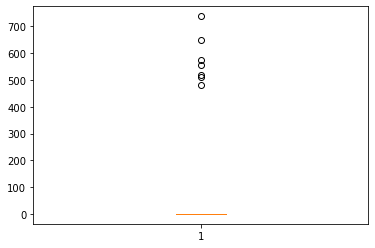

In [49]:
plt.boxplot(housing_data['PoolArea'])
plt.show()

In [51]:
Q1 = housing_data['PoolArea'].quantile(0.1)
Q3 = housing_data['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
housing_data[(housing_data['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (housing_data['PoolArea'] <= Q3 + 1.5*IQR)].shape

(1453, 81)

In [52]:
housing_data.shape

(1460, 81)

In [53]:
#Removing all outliers 

housing_data = housing_data[(housing_data['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (housing_data['PoolArea'] <= Q3 + 1.5*IQR)]
housing_data.shape

(1453, 81)

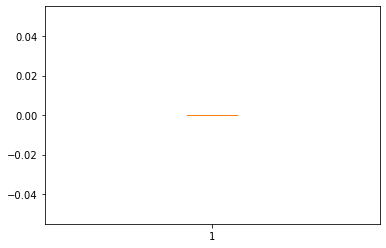

In [54]:
plt.boxplot(housing_data['PoolArea'])
plt.show()

In [55]:
housing_data.PoolArea.value_counts()

0    1453
Name: PoolArea, dtype: int64

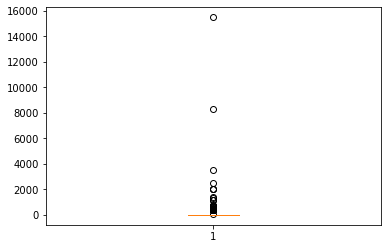

In [56]:
plt.boxplot(housing_data['MiscVal'])
plt.show()

In [57]:
Q1 = housing_data['MiscVal'].quantile(0.1)
Q3 = housing_data['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
housing_data = housing_data[(housing_data['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (housing_data['MiscVal'] <= Q3 + 1.5*IQR)]

In [58]:
housing_data.shape

(1402, 81)

(1381, 81)

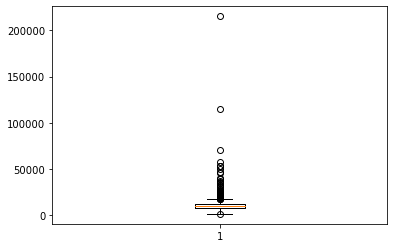

In [61]:
plt.boxplot(housing_data['LotArea'])
Q1 = housing_data['LotArea'].quantile(0.1)
Q3 = housing_data['LotArea'].quantile(0.9)
IQR = Q3 - Q1
housing_data = housing_data[(housing_data['LotArea'] >= Q1 - 1.5*IQR) & 
                      (housing_data['LotArea'] <= Q3 + 1.5*IQR)]
housing_data.shape

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa3be9f3e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa3bea07550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa3be9f3af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa3bea07c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa3bea07f70>],
 'means': []}

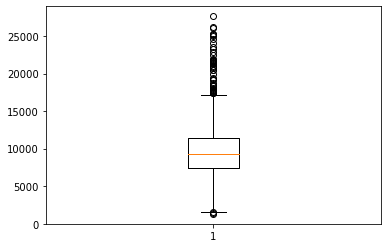

In [62]:
plt.boxplot(housing_data['LotArea'])

(1369, 81)

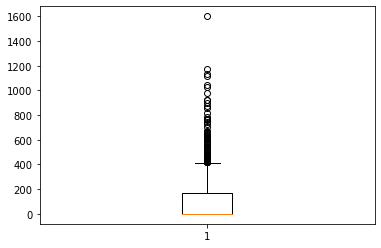

In [63]:
plt.boxplot(housing_data['MasVnrArea'])
Q1 = housing_data['MasVnrArea'].quantile(0.1)
Q3 = housing_data['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
housing_data = housing_data[(housing_data['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (housing_data['MasVnrArea'] <= Q3 + 1.5*IQR)]
housing_data.shape

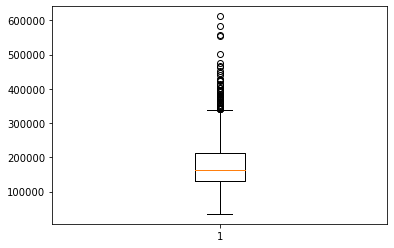

In [64]:
plt.boxplot(housing_data['SalePrice'])
plt.show()

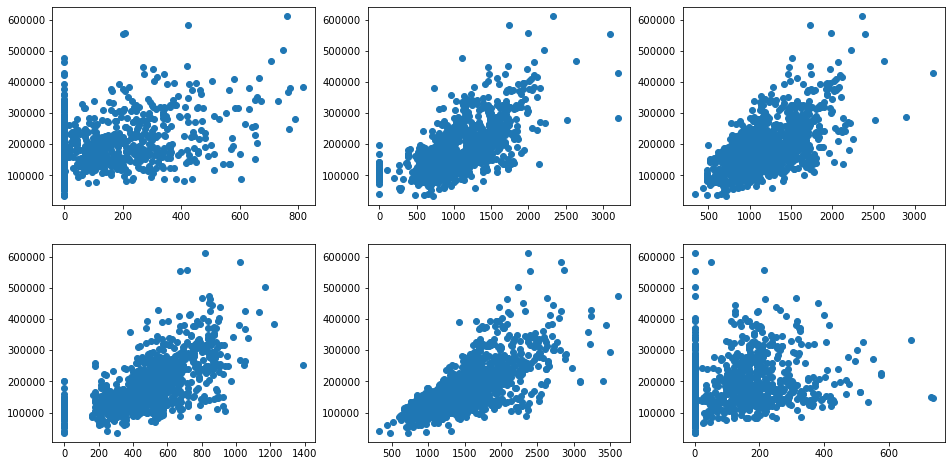

In [65]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(housing_data.MasVnrArea,housing_data.SalePrice)
plt.subplot(2,3,2)
plt.scatter(housing_data.TotalBsmtSF,housing_data.SalePrice)
plt.subplot(2,3,3)
plt.scatter(housing_data['1stFlrSF'],housing_data.SalePrice)
plt.subplot(2,3,4)
plt.scatter(housing_data['GarageArea'],housing_data.SalePrice)
plt.subplot(2,3,5)
plt.scatter(housing_data['GrLivArea'],housing_data.SalePrice)
plt.subplot(2,3,6)
plt.scatter(housing_data['WoodDeckSF'],housing_data.SalePrice)
plt.show()

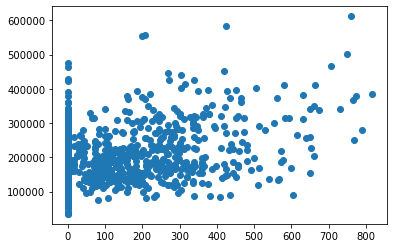

In [66]:
# MasVnrArea vs SalePrice
plt.scatter(housing_data.MasVnrArea,housing_data.SalePrice)
plt.show()

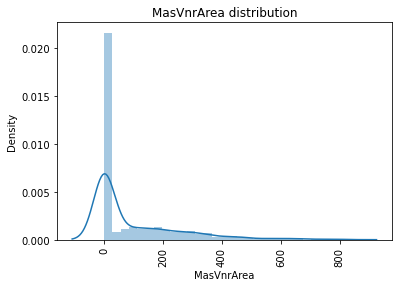

In [70]:
# distribution of MasVnrArea

sns.distplot(housing_data['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('MasVnrArea distribution')
plt.show()

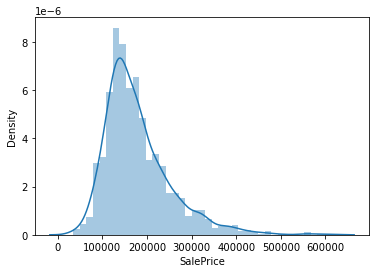

In [69]:
# Distribution of the targer variable SalePrice
sns.distplot(housing_data['SalePrice'])
plt.show()

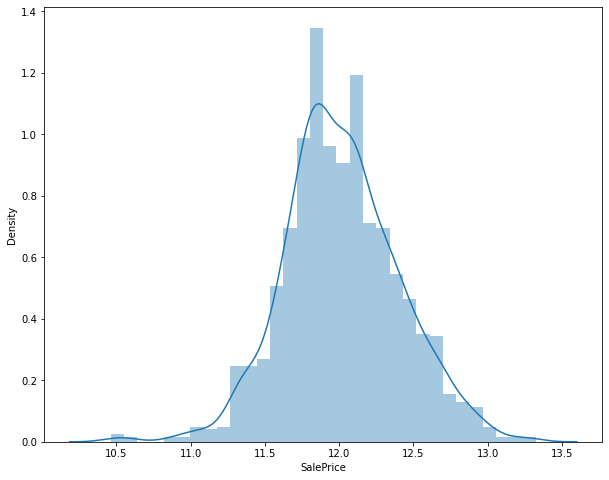

In [91]:
plt.figure(figsize=(10,8))
sns.distplot(np.log(housing_data["SalePrice"]))
plt.show()

In [71]:
housing_data['BsmtCond'].value_counts()

TA             1229
Gd               60
Fa               44
No_Basement      34
Po                2
Name: BsmtCond, dtype: int64

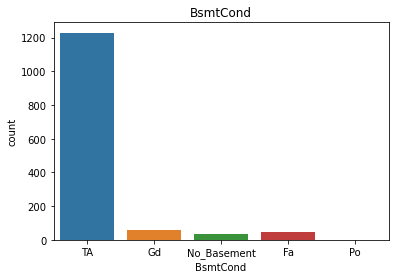

In [74]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= housing_data)
plt.title('BsmtCond')
plt.show()

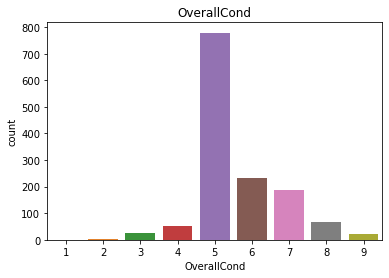

In [77]:
sns.countplot(x='OverallCond', data= housing_data).tick_params()
plt.title('OverallCond')
plt.show()

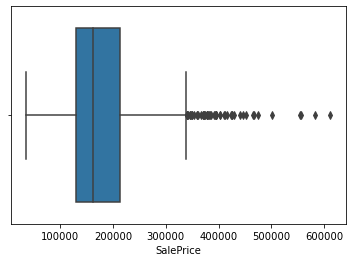

In [79]:
sns.boxplot(x='SalePrice', data=housing_data)
plt.show()

In [80]:
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

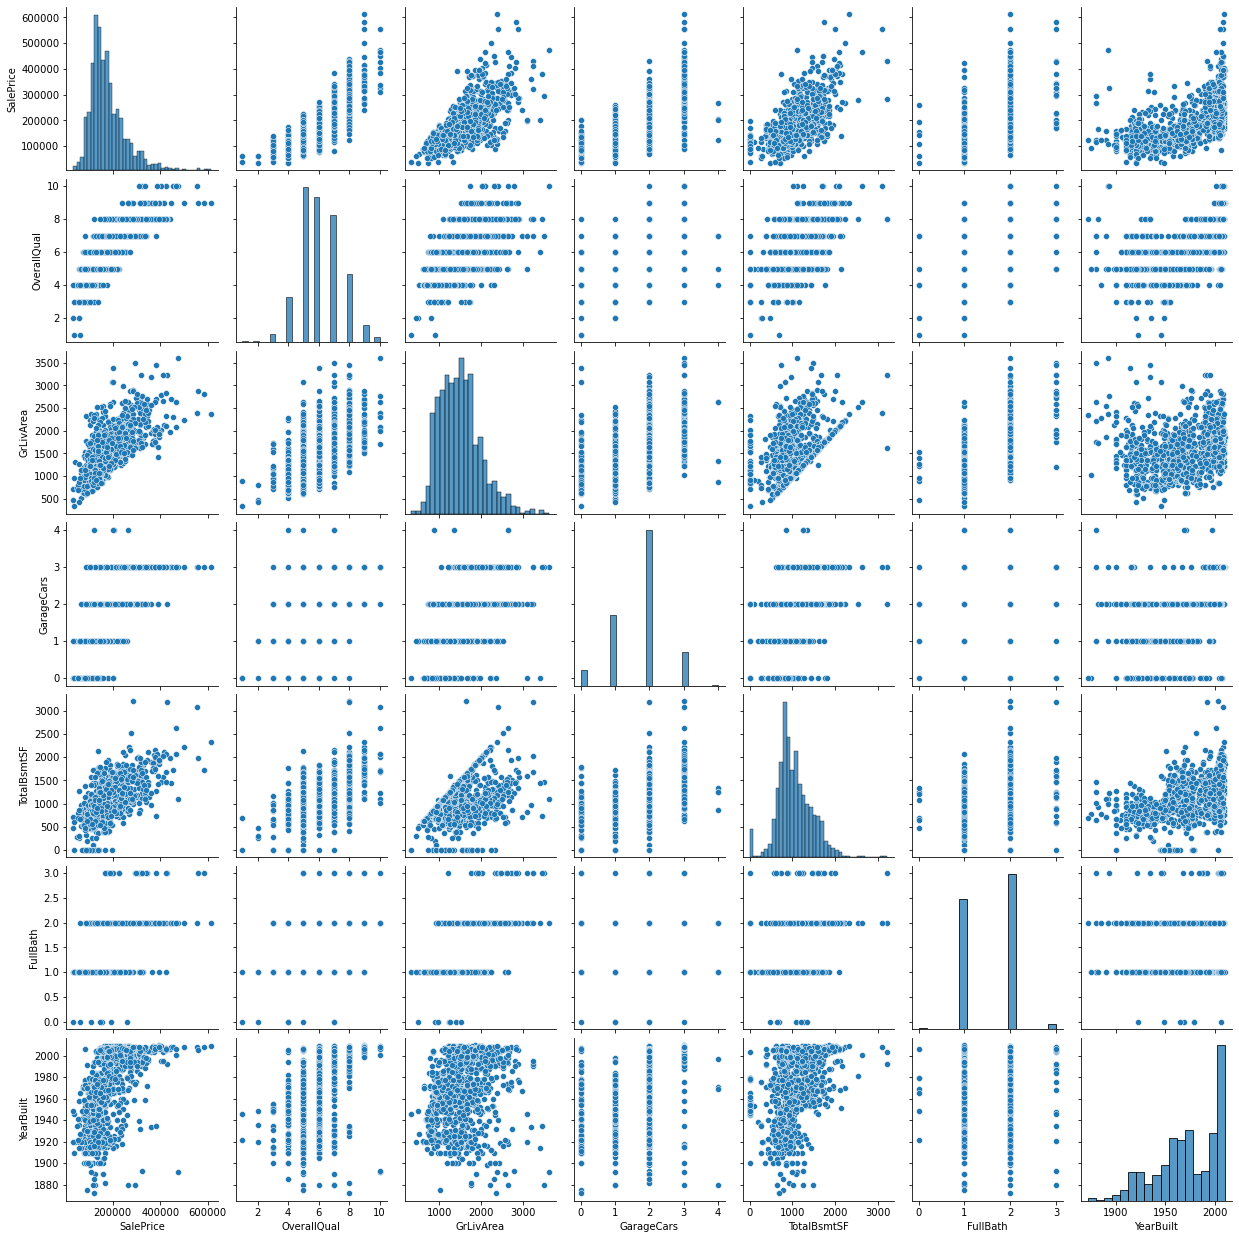

In [81]:
#Another pairplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing_data[cols])
plt.show()

In [82]:
# Correlation
housing_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.007838,-0.029345,0.004241,-0.027424,0.013876,-0.013966,-0.019325,-0.042934,-0.013402,-0.006096,-0.013252,-0.030777,0.003163,-0.007180,-0.032036,-0.007095,0.007195,-0.023501,-0.003413,0.004635,0.012499,0.004766,0.011802,-0.024844,0.008848,0.014205,0.007567,-0.031728,-0.021984,0.011296,-0.037784,-0.027200,NaN,NaN,0.021474,0.003914,-0.027925
MSSubClass,0.007838,1.000000,-0.230094,-0.398979,0.038422,-0.053597,0.021581,0.039259,0.012939,-0.080572,-0.062668,-0.138891,-0.259527,-0.266429,0.313638,0.048683,0.079218,0.006018,-0.001203,0.126471,0.179375,-0.031657,0.283746,0.034485,-0.043246,-0.078946,-0.051457,-0.113270,-0.028064,-0.001703,-0.010004,-0.046464,-0.020759,NaN,NaN,-0.011106,-0.021108,-0.093667
LotFrontage,-0.029345,-0.230094,1.000000,0.258443,0.153340,-0.046464,0.037423,0.077889,0.080335,0.003839,-0.015415,0.168744,0.181177,0.206722,0.021737,0.037196,0.178991,-0.027889,-0.020116,0.124793,-0.017933,0.155701,0.047234,0.212495,0.031797,0.022460,0.170453,0.182032,-0.018096,0.063795,0.015850,0.020151,0.025545,NaN,NaN,0.032519,-0.010048,0.211682
LotArea,0.004241,-0.398979,0.258443,1.000000,0.193358,-0.001978,0.056002,0.049564,0.123274,0.159661,0.069108,0.102183,0.304808,0.408254,0.096314,0.026620,0.395779,0.083403,0.018803,0.184377,0.090741,0.269739,-0.016499,0.362026,0.310639,0.133978,0.270741,0.309363,0.139083,0.141826,-0.013528,0.079897,0.095513,NaN,NaN,0.017130,-0.024707,0.392633
OverallQual,-0.027424,0.038422,0.153340,0.193358,1.000000,-0.096637,0.573413,0.551120,0.401149,0.210762,-0.062633,0.307421,0.529369,0.465619,0.263193,-0.038995,0.579324,0.101420,-0.043812,0.548284,0.263076,0.090393,-0.185302,0.412670,0.391298,0.289473,0.607451,0.572312,0.243304,0.318110,-0.130597,0.040050,0.074757,NaN,NaN,0.077763,-0.018665,0.805663
OverallCond,0.013876,-0.053597,-0.046464,-0.001978,-0.096637,1.000000,-0.380888,0.069215,-0.127844,-0.034913,0.042152,-0.144013,-0.176302,-0.138941,0.035018,0.033867,-0.070846,-0.046261,0.125041,-0.201715,-0.045493,0.010079,-0.077387,-0.054671,-0.023000,-0.020931,-0.183842,-0.141068,-0.000351,-0.038356,0.088906,0.032497,0.056097,NaN,NaN,-0.002984,0.047111,-0.081745
YearBuilt,-0.013966,0.021581,0.037423,0.056002,0.573413,-0.380888,1.000000,0.596543,0.318975,0.253942,-0.048049,0.147960,0.407057,0.289180,-0.014612,-0.177679,0.188063,0.191355,-0.033031,0.479362,0.220869,-0.074319,-0.182246,0.082603,0.146052,0.275586,0.542815,0.491635,0.233564,0.196988,-0.402136,0.026735,-0.041866,NaN,NaN,0.015335,-0.014025,0.547189
YearRemodAdd,-0.019325,0.039259,0.077889,0.049564,0.551120,0.069215,0.596543,1.000000,0.172065,0.129602,-0.069952,0.176343,0.299410,0.249965,0.120226,-0.057912,0.288825,0.129283,-0.013020,0.446416,0.173662,-0.045596,-0.149519,0.182920,0.106443,0.142854,0.426710,0.385012,0.217045,0.243229,-0.200223,0.043190,-0.026367,NaN,NaN,0.027265,0.041693,0.532910
MasVnrArea,-0.042934,0.012939,0.080335,0.123274,0.401149,-0.127844,0.318975,0.172065,1.000000,0.235225,-0.069365,0.108817,0.336652,0.324643,0.117675,-0.071666,0.341647,0.094640,0.011683,0.245985,0.187206,0.082049,-0.025522,0.266273,0.233335,0.141698,0.370416,0.383346,0.164914,0.132652,-0.113558,0.036370,0.068025,NaN,NaN,0.016043,0.015602,0.460866
BsmtFinSF1,-0.013402,-0.080572,0.003839,0.159661,0.210762,-0.034913,0.253942,0.129602,0.235225,1.000000,-0.057089,-0.530937,0.445691,0.373918,-0.201776,-0.070577,0.098166,0.655008,0.070832,0.034639,-0.022992,-0.135084,-0.089564,-0.011042,0.220334,0.115384,0.214946,0.260134,0.180886,0.074624,-0.127112,0.029123,0.064980,NaN,NaN,0.013324,0.029141,0.388656


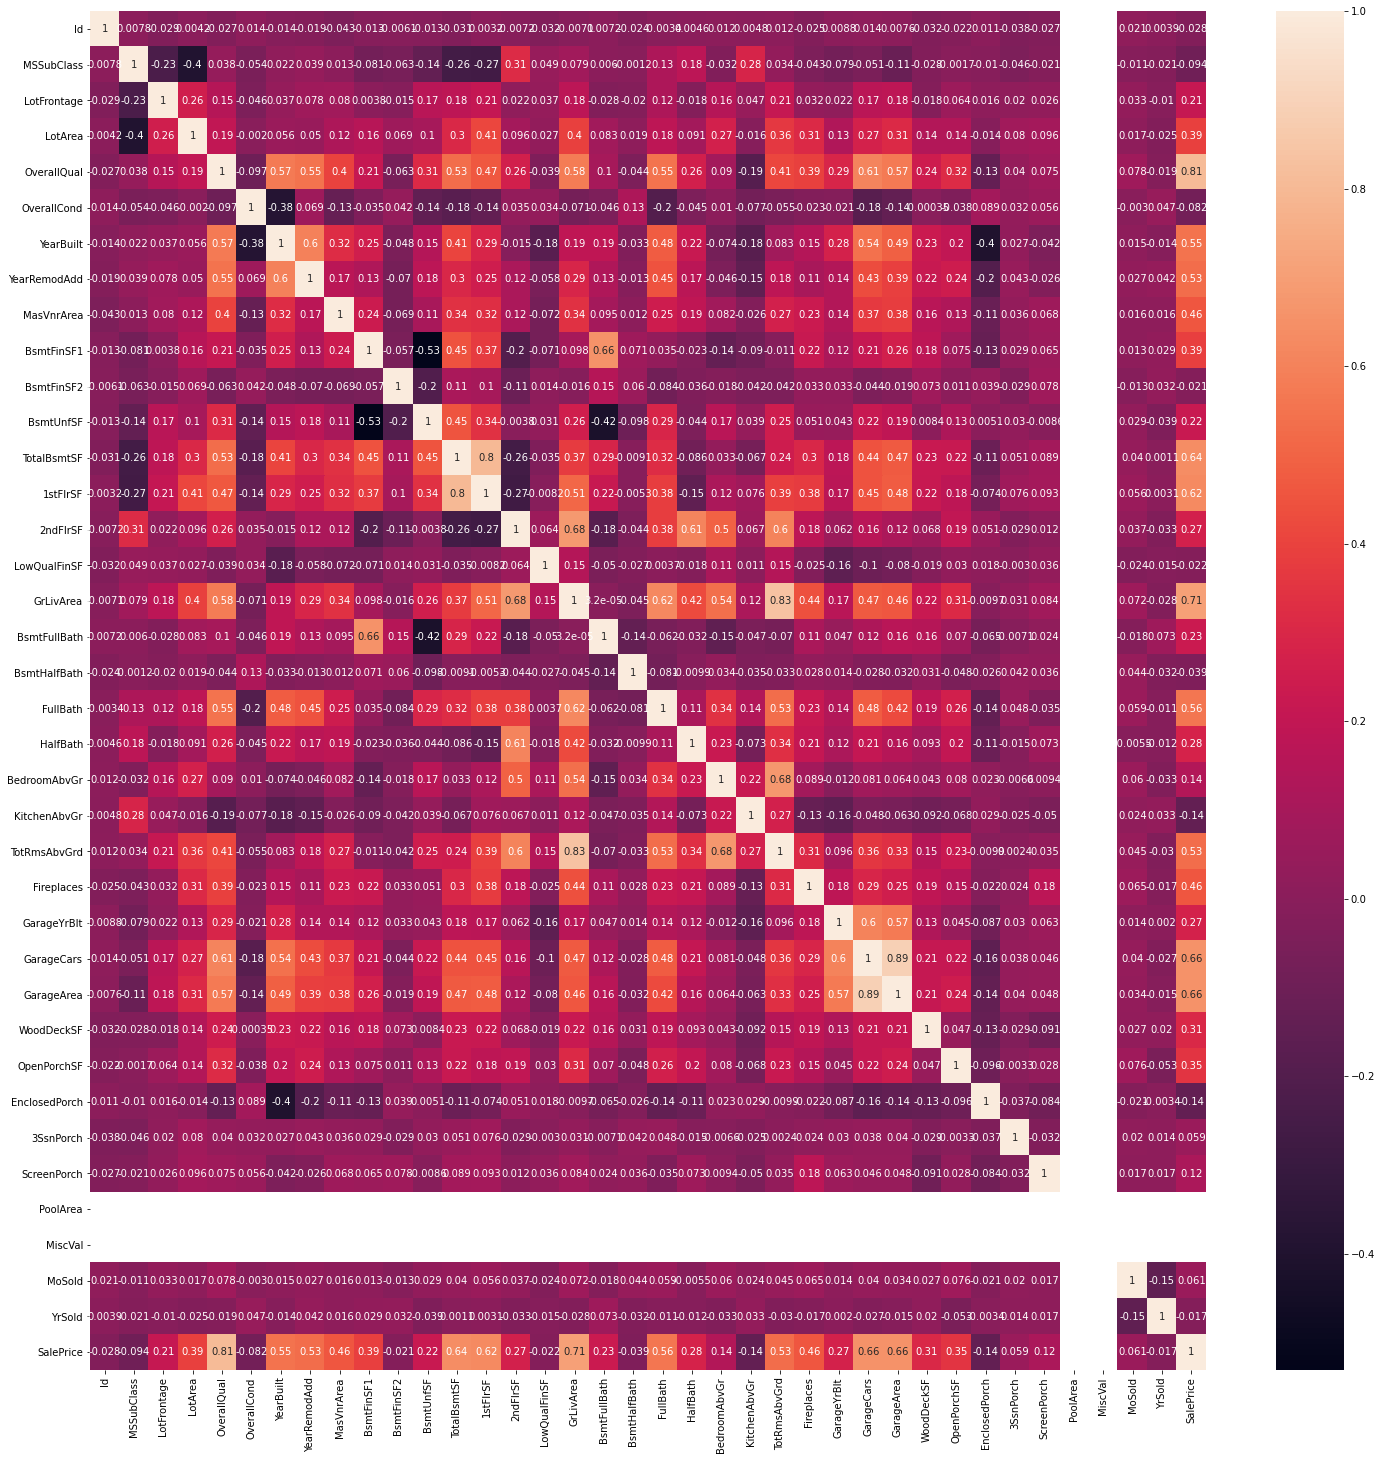

In [86]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,25))

# heatmap
sns.heatmap(housing_data.corr(), annot=True)
plt.show()

In [87]:
housing_data.PoolArea.value_counts()

0    1369
Name: PoolArea, dtype: int64

In [88]:
housing_data.MiscVal.value_counts()

0    1369
Name: MiscVal, dtype: int64

Since PoolArea and MiscVal have all same values, dropping these columns

In [89]:
housing_data = housing_data.drop(columns=['PoolArea','MiscVal'], axis=1)

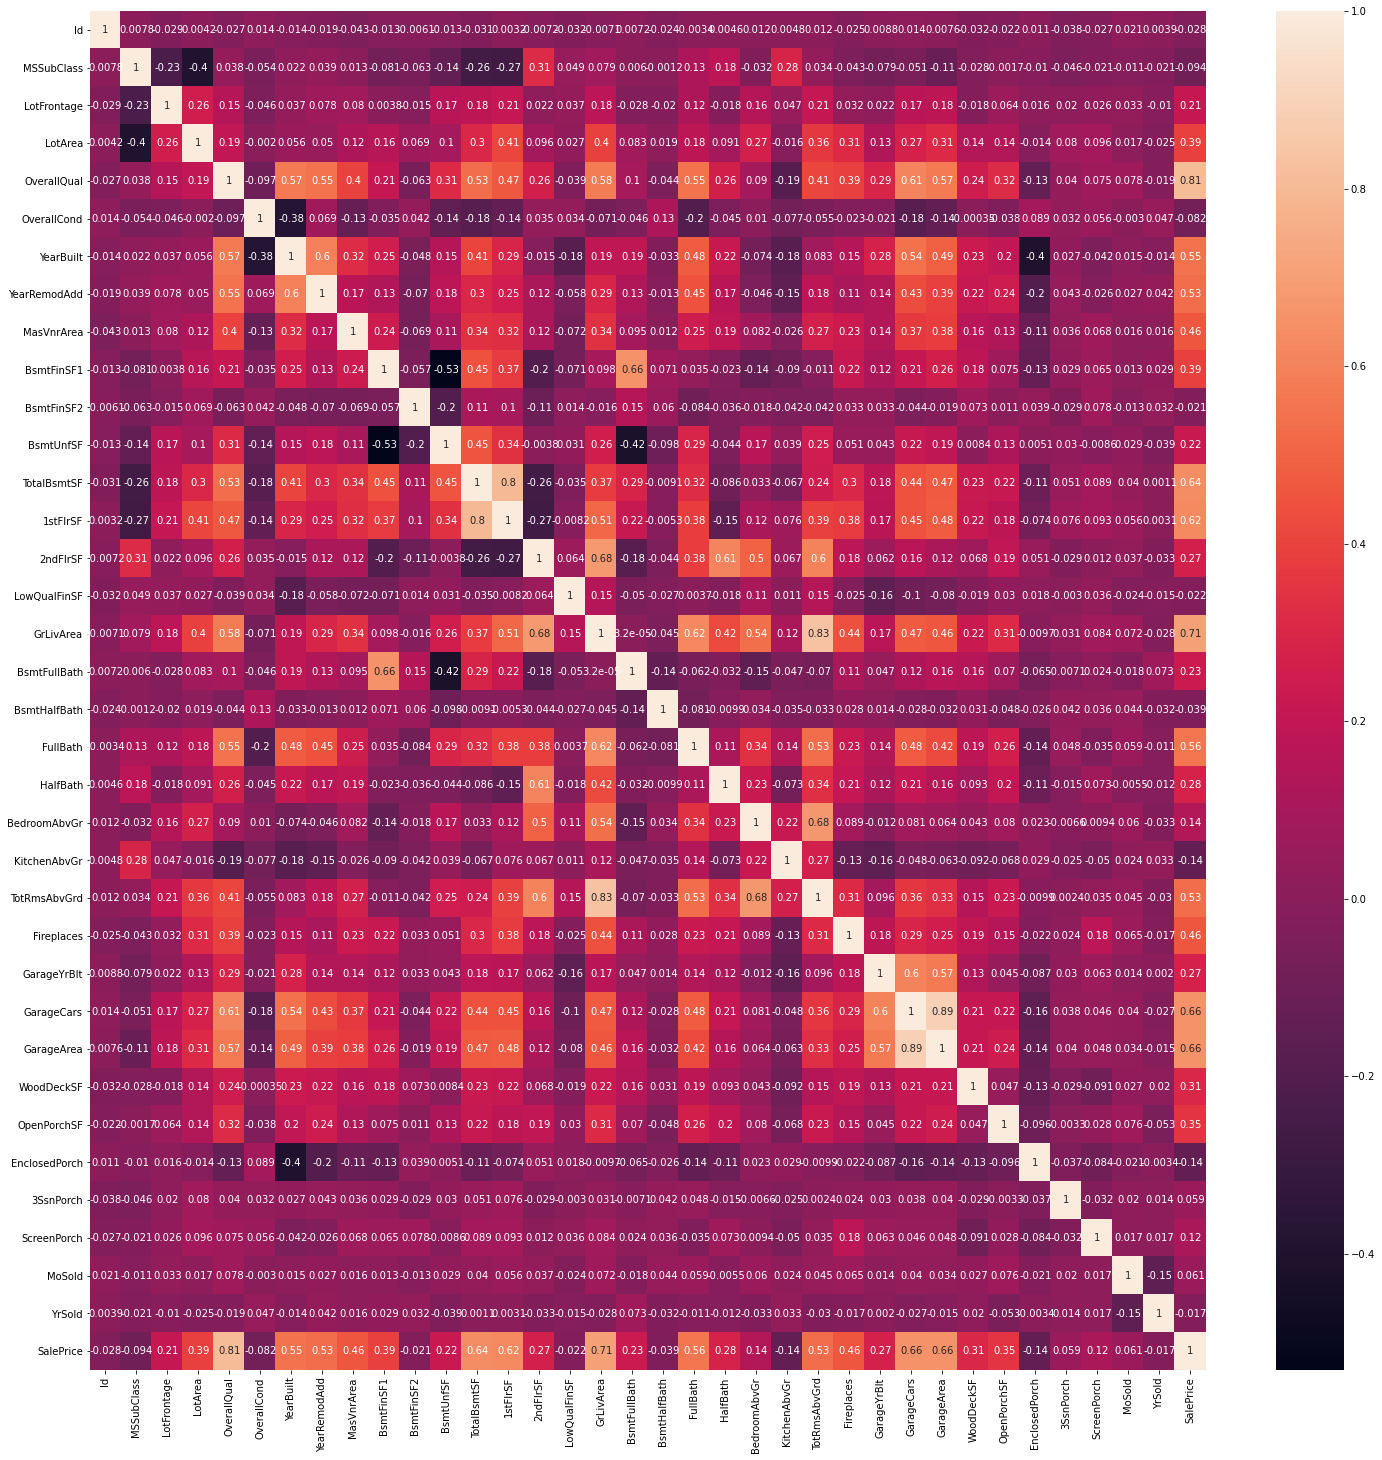

In [90]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,25))

# heatmap
sns.heatmap(housing_data.corr(), annot=True)
plt.show()

In [92]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No_Pool,No_Fence,None,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No_Pool,No_Fence,None,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No_Pool,No_Fence,None,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No_Pool,No_Fence,None,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No_Pool,No_Fence,None,12,2008,WD,Normal,250000


#### Converting Categorical variables

In [93]:
housing_data['Street'] = housing_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

In [94]:
housing_data['CentralAir'] = housing_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)

In [95]:
housing_data['PavedDrive'] = housing_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0) 

In [96]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,1,0,61,0,0,0,No_Pool,No_Fence,None,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,1,298,0,0,0,0,No_Pool,No_Fence,None,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,1,0,42,0,0,0,No_Pool,No_Fence,None,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,1,0,35,272,0,0,No_Pool,No_Fence,None,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,1,192,84,0,0,0,No_Pool,No_Fence,None,12,2008,WD,Normal,250000


In [97]:
housing_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street             int64
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


We don't need the Id column, hence dropping it

In [100]:
housing_data = housing_data.drop(['Id'],axis=1)

In [98]:
# All categorical features
categorical_features = housing_data.select_dtypes(include=['object'])
categorical_features.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [99]:
# dummy variables for all all categorical features

# convert into dummies
dummy_features = pd.get_dummies(categorical_features, drop_first=True)
dummy_features.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_Unknown,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,

In [101]:
# Concatenating the dummy features to the original dataset

df = pd.concat([housing_data,dummy_features], axis=1)
df.shape

(1369, 289)

In [102]:
# We can now drop the original categorical columns from the dataset

df = df.drop(list(categorical_features.columns), axis=1)
df.shape

(1369, 249)

In [103]:
#Creating a copy of the dataset just in case required later
df_copy = df

### Train Test Split

In [106]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [107]:
df_train.shape

(958, 249)

In [108]:
df_test.shape

(411, 249)

In [109]:
# Separating into X and y

y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [110]:
y_train.shape

(958,)

In [111]:
X_train.shape

(958, 248)

### Scaling the numerical features

In [112]:
X_train.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [114]:
numeric_features=X_train.select_dtypes(include=['int64','float64']).columns
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [115]:
# SCaling the numeric features through Standard scaling
##   Scaling the data
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

### Model Building

In [116]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train,y_train)


LinearRegression()

In [117]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11.154587355233303
[-1.86159728e-02 -3.00196560e-03  4.79389304e-03 -9.35934056e-03
  5.03505583e-02  3.17080057e-02  4.35142638e-02  2.12302531e-02
 -9.87327346e-03 -1.14706518e+12 -4.38873396e+11 -1.19699368e+12
  1.10395872e+12  1.88402185e-02  2.04581636e+12  2.38015726e+12
  2.15798701e+11 -2.63877527e+12  1.81017604e-02 -1.00313274e-03
  3.07094248e-02  2.79845380e-02  9.22661110e-04 -8.33544873e-03
  7.33109311e-03 -9.77753872e-03 -2.39409712e-01  3.81518769e-02
  9.25183579e-04  7.10369689e-03  8.09539952e-03  3.58684304e-03
 -1.10952904e-03 -1.76685021e-03  1.87457091e-02  1.92363243e-03
 -2.08819845e-03  6.57610009e-01  6.41030839e-01  6.18724987e-01
  5.01813931e-01 -5.73299481e-02 -2.53498878e-02  1.58595599e-02
  1.13940882e-01  2.41596688e-02 -4.89672600e-02 -6.77487849e-02
  2.04763135e-02 -5.95730718e+11  1.05353806e-01 -2.25997085e-02
  9.04912635e-02  3.11348051e-03  1.53107850e-02 -8.95833522e-02
  8.46740429e-02  4.09407964e-02  8.40431576e-02 -2.90634824e-02
  4.74

#### RFE

In [128]:
# Calculating the RFE
# Selecting 20 features
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [119]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 137),
 ('LotFrontage', False, 212),
 ('LotArea', False, 114),
 ('Street', False, 208),
 ('OverallQual', True, 1),
 ('OverallCond', False, 86),
 ('YearBuilt', False, 68),
 ('YearRemodAdd', False, 150),
 ('MasVnrArea', False, 214),
 ('BsmtFinSF1', False, 24),
 ('BsmtFinSF2', False, 27),
 ('BsmtUnfSF', False, 28),
 ('TotalBsmtSF', False, 21),
 ('CentralAir', False, 169),
 ('1stFlrSF', False, 29),
 ('2ndFlrSF', False, 25),
 ('LowQualFinSF', False, 31),
 ('GrLivArea', False, 12),
 ('BsmtFullBath', False, 153),
 ('BsmtHalfBath', False, 225),
 ('FullBath', False, 172),
 ('HalfBath', False, 173),
 ('BedroomAbvGr', False, 216),
 ('KitchenAbvGr', False, 165),
 ('TotRmsAbvGrd', False, 186),
 ('Fireplaces', False, 209),
 ('GarageYrBlt', False, 189),
 ('GarageCars', False, 95),
 ('GarageArea', False, 175),
 ('PavedDrive', False, 190),
 ('WoodDeckSF', False, 181),
 ('OpenPorchSF', False, 207),
 ('EnclosedPorch', False, 188),
 ('3SsnPorch', False, 217),
 ('ScreenPorch', False, 

In [120]:
X_train.columns[rfe.support_]

Index(['OverallQual', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Veenker',
       'Exterior1st_BrkComm', 'Foundation_Stone', 'BsmtCond_Po',
       'Heating_GasA', 'Heating_GasW', 'Heating_Wall', 'Electrical_Mix',
       'Electrical_Unknown', 'Functional_Maj2', 'Functional_Sev',
       'GarageType_No_Garage', 'SaleType_Oth', 'SaleCondition_Partial'],
      dtype='object')

In [121]:
X_train.columns[~rfe.support_]   

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=228)

In [129]:
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Veenker',
       'Exterior1st_BrkComm', 'Foundation_Stone', 'BsmtCond_Po',
       'Heating_GasA', 'Heating_GasW', 'Heating_Wall', 'Electrical_Mix',
       'Electrical_Unknown', 'Functional_Maj2', 'Functional_Sev',
       'GarageType_No_Garage', 'SaleType_Oth', 'SaleCondition_Partial'],
      dtype='object')

In [130]:
X_train_new=X_train[col]

In [131]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif    

,Features,VIF
10,Heating_GasA,69.72
3,MSZoning_RL,57.24
4,MSZoning_RM,10.99
1,MSZoning_FV,3.86
9,BsmtCond_Po,3.05
13,Electrical_Mix,2.80
2,MSZoning_RH,1.82
11,Heating_GasW,1.77
5,LandSlope_Sev,1.52
12,Heating_Wall,1.33


In [133]:
import statsmodels
import statsmodels.api as sm

In [134]:
X_train_lm = sm.add_constant(X_train_new)

In [135]:
#create first model
lr=sm.OLS(y_train,X_train_lm)

In [136]:
#fit the model
lr_model=lr.fit()

In [137]:
lr_model.params  

const                    11.148093
OverallQual               0.276180
MSZoning_FV               0.463676
MSZoning_RH               0.529789
MSZoning_RL               0.542241
MSZoning_RM               0.338941
LandSlope_Sev            -0.157338
Neighborhood_Veenker      0.163671
Exterior1st_BrkComm      -0.822318
Foundation_Stone          0.228003
BsmtCond_Po               0.313313
Heating_GasA              0.350539
Heating_GasW              0.428345
Heating_Wall              0.260810
Electrical_Mix           -0.433663
Electrical_Unknown        0.204321
Functional_Maj2          -0.388320
Functional_Sev           -0.260149
GarageType_No_Garage     -0.148569
SaleType_Oth              0.243249
SaleCondition_Partial     0.130762
dtype: float64

In [138]:
#Print the summary 
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     145.4
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          1.52e-270
Time:                        10:37:13   Log-Likelihood:                 227.57
No. Observations:                 958   AIC:                            -413.1
Df Residuals:                     937   BIC:                            -311.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.14

This is the initial model using Linear Regression. 
Next step is to try Ridge and Lasso (Currently skipping the model tuning)

### Ridge

In [139]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [140]:
ridge = Ridge()

In [141]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [142]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [143]:
print(model_cv.best_score_)

-0.08249217734091405


## Optimal value for alpha is 20 for ridge

In [144]:
model_cv.cv_results_

{'mean_fit_time': array([0.13576679, 0.00947514, 0.01059999, 0.00942278, 0.01258812,
        0.01046157, 0.01021247, 0.00892925, 0.01239462, 0.01144819,
        0.01603465, 0.01958222, 0.01098528, 0.0097868 , 0.01096835,
        0.0099915 , 0.01146007, 0.00954881, 0.0100358 , 0.00900612,
        0.00995507, 0.01014681, 0.00973883, 0.01266146, 0.01662574,
        0.01129928, 0.01052251, 0.05593438]),
 'std_fit_time': array([2.48243560e-01, 3.74563391e-04, 2.71580400e-03, 6.11333746e-04,
        6.60217504e-03, 2.28401856e-03, 1.63744541e-03, 2.06205306e-04,
        2.18953914e-04, 2.61019249e-03, 3.57500497e-03, 4.55755766e-03,
        3.33039909e-03, 6.95586544e-04, 3.73816583e-03, 1.01091777e-03,
        2.68902625e-03, 7.40346862e-04, 5.82156412e-04, 7.47498483e-05,
        9.65189750e-04, 1.45912371e-03, 1.34534507e-03, 2.41669853e-03,
        3.79259710e-03, 2.25450190e-03, 2.43885143e-03, 8.32211031e-02]),
 'mean_score_time': array([0.01120887, 0.00394707, 0.00451088, 0.00431266, 

In [145]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha'] <=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.135767,0.248244,0.011209,0.010001,0.0001,{'alpha': 0.0001},-0.084397,-0.096010,-0.104304,-0.103437,-0.099155,-0.097460,0.007186,27,-0.060561,-0.057244,-0.057155,-0.059933,-0.058951,-0.058769,0.001380
1,0.009475,0.000375,0.003947,0.000094,0.001,{'alpha': 0.001},-0.084350,-0.095858,-0.104261,-0.103318,-0.099108,-0.097379,0.007179,26,-0.060567,-0.057268,-0.057173,-0.059944,-0.058956,-0.058781,0.001375
2,0.010600,0.002716,0.004511,0.000728,0.01,{'alpha': 0.01},-0.083908,-0.094767,-0.103887,-0.102606,-0.098667,-0.096767,0.007180,25,-0.060651,-0.057488,-0.057345,-0.060056,-0.059002,-0.058908,0.001328
3,0.009423,0.000611,0.004313,0.000467,0.05,{'alpha': 0.05},-0.082453,-0.092276,-0.103580,-0.100271,-0.097360,-0.095188,0.007371,24,-0.061137,-0.058199,-0.057887,-0.060573,-0.059197,-0.059399,0.001278
4,0.012588,0.006602,0.004294,0.000253,0.1,{'alpha': 0.1},-0.081402,-0.090886,-0.103253,-0.098382,-0.096267,-0.094038,0.007462,23,-0.061626,-0.058754,-0.058379,-0.061128,-0.059415,-0.059860,0.001292
5,0.010462,0.002284,0.003994,0.000090,0.2,{'alpha': 0.2},-0.080102,-0.089253,-0.102549,-0.095612,-0.094634,-0.092430,0.007476,22,-0.062266,-0.059479,-0.059062,-0.061982,-0.059807,-0.060519,0.001335
6,0.010212,0.001637,0.004227,0.000160,0.3,{'alpha': 0.3},-0.079379,-0.088193,-0.101875,-0.093547,-0.093335,-0.091266,0.007386,21,-0.062743,-0.060041,-0.059505,-0.062626,-0.060112,-0.061006,0.001387
7,0.008929,0.000206,0.004867,0.000867,0.4,{'alpha': 0.4},-0.078937,-0.087589,-0.101454,-0.091914,-0.092397,-0.090458,0.007318,20,-0.063107,-0.060515,-0.059834,-0.063168,-0.060417,-0.061408,0.001431
8,0.012395,0.000219,0.007662,0.002851,0.5,{'alpha': 0.5},-0.078575,-0.087192,-0.101521,-0.090591,-0.091715,-0.089919,0.007408,18,-0.063391,-0.060911,-0.060078,-0.063609,-0.060708,-0.061739,0.001465
9,0.011448,0.002610,0.004464,0.000699,0.6,{'alpha': 0.6},-0.078278,-0.086852,-0.101508,-0.089471,-0.091167,-0.089455,0.007482,17,-0.063627,-0.061247,-0.060290,-0.063975,-0.061024,-0.062033,0.001482


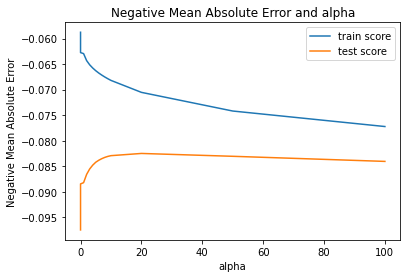

In [146]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
# plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [147]:
#final ridge model
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-9.29394643e-03,  8.81852327e-04,  1.87381588e-02, -4.13566268e-03,
        7.11920410e-02,  4.88470514e-02,  5.26065963e-02,  1.94102216e-02,
        3.08412967e-03,  3.42171728e-02,  7.56667860e-03,  4.28132092e-03,
        4.32034772e-02,  1.52859718e-02,  3.42258779e-02,  3.58232043e-02,
        1.40143234e-03,  5.89618790e-02,  1.45243321e-02, -1.66200880e-03,
        2.11676847e-02,  1.90143059e-02,  2.01329442e-03, -1.28938522e-02,
        1.65785358e-02,  6.51583871e-03,  6.94368074e-03,  2.02036786e-02,
        1.65339020e-02,  6.05042486e-03,  1.11652673e-02, -7.89943446e-04,
        1.01624734e-02,  1.64869736e-03,  1.58124782e-02,  8.02160322e-04,
       -5.80642143e-03,  3.62272443e-02,  1.90362836e-02,  3.96763683e-02,
        3.88657329e-03, -1.05903917e-02,  1.75821123e-02,  1.44129592e-02,
       -8.30625209e-04, -3.32215552e-03,  7.75273520e-03, -2.24416281e-02,
        4.38857334e-03,  0.00000000e+00,  2.08246972e-02, -1.92104679e-02,
        1.60981541e-04, -

In [148]:
# r2 score
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.9263647786755947


In [149]:
# Run model on test set and calculate r2 score
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.938121325175959


The r2 score looks decent on both the train as well as the test sets

In [150]:
print(ridge.coef_)

[-9.29394643e-03  8.81852327e-04  1.87381588e-02 -4.13566268e-03
  7.11920410e-02  4.88470514e-02  5.26065963e-02  1.94102216e-02
  3.08412967e-03  3.42171728e-02  7.56667860e-03  4.28132092e-03
  4.32034772e-02  1.52859718e-02  3.42258779e-02  3.58232043e-02
  1.40143234e-03  5.89618790e-02  1.45243321e-02 -1.66200880e-03
  2.11676847e-02  1.90143059e-02  2.01329442e-03 -1.28938522e-02
  1.65785358e-02  6.51583871e-03  6.94368074e-03  2.02036786e-02
  1.65339020e-02  6.05042486e-03  1.11652673e-02 -7.89943446e-04
  1.01624734e-02  1.64869736e-03  1.58124782e-02  8.02160322e-04
 -5.80642143e-03  3.62272443e-02  1.90362836e-02  3.96763683e-02
  3.88657329e-03 -1.05903917e-02  1.75821123e-02  1.44129592e-02
 -8.30625209e-04 -3.32215552e-03  7.75273520e-03 -2.24416281e-02
  4.38857334e-03  0.00000000e+00  2.08246972e-02 -1.92104679e-02
  1.60981541e-04 -1.14457125e-02  4.29920884e-03 -1.14971866e-02
  6.04668092e-04 -1.72299339e-02  2.86867548e-02 -7.73798102e-03
  3.33122365e-03  5.95764

Some other metrics

In [151]:
#RSS
rss_ridge_train = np.sum(np.square(y_train - y_train_pred))
print(rss_ridge_train)

10.538257842837492


In [152]:
#RSS
rss_ridge_test = np.sum(np.square(y_test - y_test_pred))
print(rss_ridge_test)


3.975987961060694


In [154]:
# MSE and RMSE
mse_ridge_train = mean_squared_error(y_train, y_train_pred)
print(mse_ridge_train)
print(mse_ridge_train**0.5)

0.011000269147011996
0.10488216791720123


In [155]:
# MSE and RMSE
mse_ridge_test = mean_squared_error(y_test, y_test_pred)
print(mse_ridge_test)
print(mse_ridge_test**0.5)

0.009673936644916531
0.0983561723783339


In [181]:
# CHecking the features that have been selected
main_ridge_coef=pd.Series(ridge.coef_,index=X_train.columns)
main_ridge_coef

MSSubClass                 -0.009294
LotFrontage                 0.000882
LotArea                     0.018738
Street                     -0.004136
OverallQual                 0.071192
OverallCond                 0.048847
YearBuilt                   0.052607
YearRemodAdd                0.019410
MasVnrArea                  0.003084
BsmtFinSF1                  0.034217
BsmtFinSF2                  0.007567
BsmtUnfSF                   0.004281
TotalBsmtSF                 0.043203
CentralAir                  0.015286
1stFlrSF                    0.034226
2ndFlrSF                    0.035823
LowQualFinSF                0.001401
GrLivArea                   0.058962
BsmtFullBath                0.014524
BsmtHalfBath               -0.001662
FullBath                    0.021168
HalfBath                    0.019014
BedroomAbvGr                0.002013
KitchenAbvGr               -0.012894
TotRmsAbvGrd                0.016579
Fireplaces                  0.006516
GarageYrBlt                 0.006944
G

Checking for the main features. Included both positive and negative coefficients

In [182]:
main_ridge_features=pd.concat([main_ridge_coef.sort_values(ascending=False).head(10),main_ridge_coef.sort_values(ascending=False).tail(10)])
main_ridge_features

OverallQual             0.071192
Neighborhood_Crawfor    0.059576
GrLivArea               0.058962
Functional_Typ          0.054267
YearBuilt               0.052607
SaleCondition_Normal    0.051877
OverallCond             0.048847
Neighborhood_StoneBr    0.046739
Condition1_Norm         0.043703
TotalBsmtSF             0.043203
KitchenQual_Gd         -0.025576
SaleType_WD            -0.026203
Neighborhood_Edwards   -0.028760
HeatingQC_Fa           -0.029259
Neighborhood_MeadowV   -0.029553
HeatingQC_TA           -0.029997
Functional_Maj2        -0.034108
Condition1_RRAe        -0.034684
BldgType_Twnhs         -0.036128
Neighborhood_IDOTRR    -0.042451
dtype: float64


### Lasso

In [156]:
lasso = Lasso()

In [158]:
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)    

In [159]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [160]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.207267,0.173445,0.009649,0.008731,0.0001,{'alpha': 0.0001},-0.076542,-0.084604,-0.096447,-0.088415,-0.088093,-0.086820,0.006440,2,-0.064230,-0.061686,-0.060350,-0.063520,-0.061697,-0.062297,0.001397
1,0.023898,0.001784,0.006885,0.004609,0.001,{'alpha': 0.001},-0.079375,-0.082370,-0.095110,-0.074184,-0.083237,-0.082855,0.006897,1,-0.074788,-0.072913,-0.069834,-0.076931,-0.074488,-0.073791,0.002356
2,0.011507,0.001990,0.003786,0.000153,0.01,{'alpha': 0.01},-0.087772,-0.093007,-0.104082,-0.080256,-0.097392,-0.092502,0.008131,3,-0.091108,-0.089565,-0.087220,-0.093403,-0.089200,-0.090099,0.002065
3,0.012607,0.003912,0.005264,0.001682,0.05,{'alpha': 0.05},-0.102294,-0.120988,-0.122128,-0.111676,-0.121885,-0.115794,0.007790,4,-0.115886,-0.113278,-0.111367,-0.117017,-0.111342,-0.113778,0.002321
4,0.010438,0.001485,0.004057,0.000524,0.1,{'alpha': 0.1},-0.138155,-0.160734,-0.159918,-0.154902,-0.156833,-0.154109,0.008249,5,-0.153335,-0.152876,-0.151934,-0.154258,-0.148324,-0.152145,0.002052


In [174]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [162]:
print(model_cv.best_score_)

-0.08285521889305081


## Optimal value for alpha is 0.001 for Lasso

In [163]:
alpha = 0.001

In [164]:
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [165]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9186564331469806


In [166]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9399158301166365


In [167]:
mean_squared_error(y_test, y_test_pred)

0.009393388828492397

In [168]:
lasso.coef_

array([-0.00400519,  0.00123345,  0.01862251, -0.00190688,  0.08178503,
        0.04952798,  0.06178098,  0.01725633,  0.00024101,  0.03242181,
        0.00274594, -0.        ,  0.03766894,  0.01202045,  0.00731016,
        0.        , -0.        ,  0.10999219,  0.01575724, -0.00012954,
        0.01446899,  0.01274008,  0.        , -0.0119888 ,  0.01347778,
        0.00951006,  0.0060189 ,  0.01926012,  0.0192275 ,  0.00441423,
        0.0111568 , -0.        ,  0.00936546,  0.        ,  0.01564678,
       -0.        , -0.00370594,  0.06051044,  0.        ,  0.04561293,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.00273438,  0.        , -0.        ,  0.        ,  0.        ,
        0.01383844, -0.        ,  0.        , -0.00619421,  0.        ,
       -0.        ,  0.        , -0.        ,  0.0396524 , -0.        ,
        0.        ,  0.07117418, -0.00743838, -0.        , -0.01613315,
       -0.        , -0.00684602,  0.        ,  0.        , -0.00

#### Lets calculate some metrics such as R2 score, RSS and RMSE

In [169]:
#RSS
rss_lasso_train = np.sum(np.square(y_train - y_train_pred))
print(rss_lasso_train)

#RSS
rss_lasso_test = np.sum(np.square(y_test - y_test_pred))
print(rss_lasso_test)


11.641432808039859
3.860682808510375


In [170]:
# MSE and RMSE
mse_lassso_train = mean_squared_error(y_train, y_train_pred)
print(mse_lassso_train)
print(mse_lassso_train**0.5)

# MSE and RMSE
mse_lassso_test = mean_squared_error(y_test, y_test_pred)
print(mse_lassso_test)
print(mse_lassso_test**0.5)

0.012151808776659561
0.11023524289744892
0.009393388828492397
0.09691949663763424


In [171]:
## Lets observe the changes in the coefficients after regularization

betas = pd.DataFrame(index=X_train.columns)

betas.rows = X_train.columns

betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas

,Linear,Ridge,Lasso
MSSubClass,-1.861597e-02,-0.009294,-0.004005
LotFrontage,-3.001966e-03,0.000882,0.001233
LotArea,4.793893e-03,0.018738,0.018623
Street,-9.359341e-03,-0.004136,-0.001907
OverallQual,5.035056e-02,0.071192,0.081785
OverallCond,3.170801e-02,0.048847,0.049528
YearBuilt,4.351426e-02,0.052607,0.061781
YearRemodAdd,2.123025e-02,0.019410,0.017256
MasVnrArea,-9.873273e-03,0.003084,0.000241
BsmtFinSF1,-1.147065e+12,0.034217,0.032422


In [178]:
lasso.coef_

array([-0.00400519,  0.00123345,  0.01862251, -0.00190688,  0.08178503,
        0.04952798,  0.06178098,  0.01725633,  0.00024101,  0.03242181,
        0.00274594, -0.        ,  0.03766894,  0.01202045,  0.00731016,
        0.        , -0.        ,  0.10999219,  0.01575724, -0.00012954,
        0.01446899,  0.01274008,  0.        , -0.0119888 ,  0.01347778,
        0.00951006,  0.0060189 ,  0.01926012,  0.0192275 ,  0.00441423,
        0.0111568 , -0.        ,  0.00936546,  0.        ,  0.01564678,
       -0.        , -0.00370594,  0.06051044,  0.        ,  0.04561293,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.00273438,  0.        , -0.        ,  0.        ,  0.        ,
        0.01383844, -0.        ,  0.        , -0.00619421,  0.        ,
       -0.        ,  0.        , -0.        ,  0.0396524 , -0.        ,
        0.        ,  0.07117418, -0.00743838, -0.        , -0.01613315,
       -0.        , -0.00684602,  0.        ,  0.        , -0.00

In [179]:
# CHecking the features that have been selected by Lasso
main_coef=pd.Series(lasso.coef_,index=X_train.columns)
var_selected= sum(lasso.coef_!=0)
print("the num of feautes selected by lasso : ",var_selected)

the num of feautes selected by lasso :  75


Selecting both positive and negative coefficients

In [180]:
main_features=pd.concat([main_coef.sort_values(ascending=False).head(10),main_coef.sort_values(ascending=False).tail(10)])
main_features

GrLivArea               0.109992
OverallQual             0.081785
SaleType_New            0.080737
Neighborhood_Crawfor    0.071174
YearBuilt               0.061781
Functional_Typ          0.060664
MSZoning_FV             0.060510
SaleCondition_Normal    0.053139
OverallCond             0.049528
MSZoning_RL             0.045613
BsmtExposure_No        -0.010002
KitchenQual_TA         -0.010014
KitchenAbvGr           -0.011989
KitchenQual_Gd         -0.012803
Fence_GdWo             -0.013867
Neighborhood_IDOTRR    -0.016133
SaleType_WD            -0.018648
HeatingQC_Fa           -0.020324
HeatingQC_TA           -0.027492
BldgType_Twnhs         -0.046101
dtype: float64

**On comparing the features in both Lasso and Ridge, below are the important predictors**
- BldgType_Twnhs : Type of dwelling, Townhouse
- Functional_Typ : Home functionality, Typical Functionality
- GrLivArea  : Above grade (ground) living area square feet
- HeatingQC_Fa : Heating quality and condition,Fair
- HeatingQC_TA : Heating quality and condition,Average/Typical
- KitchenQual_Gd : Kitchen quality, Good 
- Neighborhood_Crawfor : Physical locations within Ames city limits, Crawford 
- Neighborhood_IDOTRR : Physical locations within Ames city limits, Iowa DOT and Rail Road 
- OverallCond : Overall condition of the house
- OverallQual : Overall material and finish of the house 
- SaleCondition_Normal : Condition of sale, Normal Sale
- SaleType_WD : Type of sale, Warranty Deed - Conventional
- YearBuilt : Original construction date   




# Doubling the value of alpha for Ridge and Lasso

## Ridge

In [184]:
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-7.95773223e-03,  1.77943266e-03,  1.88820895e-02, -3.57258515e-03,
        7.21477766e-02,  4.83476399e-02,  4.76313750e-02,  2.00095396e-02,
        4.58105291e-03,  3.40048920e-02,  6.56535821e-03,  4.04027008e-03,
        4.23234723e-02,  1.55890084e-02,  3.41566055e-02,  3.29321907e-02,
        1.22777623e-03,  5.62862968e-02,  1.48389621e-02, -1.58341576e-03,
        2.12592009e-02,  1.93129392e-02,  1.97241646e-03, -1.24603910e-02,
        1.83446596e-02,  9.53860900e-03,  7.00663580e-03,  1.99992255e-02,
        1.83362000e-02,  7.53482329e-03,  1.10522915e-02, -2.65985963e-04,
        9.51437639e-03,  1.63415865e-03,  1.59620092e-02,  1.09186184e-03,
       -5.97328542e-03,  2.35748047e-02,  1.06394684e-02,  2.89674519e-02,
       -1.01180412e-02, -8.23726670e-03,  1.31682836e-02,  9.55567814e-03,
       -6.80842022e-04, -5.97671140e-03,  6.50837369e-03, -1.45977832e-02,
        1.39731249e-03,  0.00000000e+00,  1.68976310e-02, -1.28706329e-02,
        2.83758885e-04, -

The absolute value of the coefficients have shrinked a bit.

In [185]:
# r2 score
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

# Run model on test set and calculate r2 score
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9213490280426234
0.936798460196487


In [186]:
#RSS
rss_ridge_train = np.sum(np.square(y_train - y_train_pred))
print(rss_ridge_train)


#RSS
rss_ridge_test = np.sum(np.square(y_test - y_test_pred))
print(rss_ridge_test)

11.256083802954606
4.060988088284584


In [187]:
# MSE and RMSE
mse_ridge_train = mean_squared_error(y_train, y_train_pred)
print(mse_ridge_train)
print(mse_ridge_train**0.5)


# MSE and RMSE
mse_ridge_test = mean_squared_error(y_test, y_test_pred)
print(mse_ridge_test)
print(mse_ridge_test**0.5)

0.011749565556320049
0.10839541298560584
0.009880749606531835
0.09940195977208817


In [191]:
# CHecking the features that have been selected by Ridge
main_ridge_coef=pd.Series(ridge.coef_,index=X_train.columns)
main_ridge_coef

MSSubClass                 -0.007958
LotFrontage                 0.001779
LotArea                     0.018882
Street                     -0.003573
OverallQual                 0.072148
OverallCond                 0.048348
YearBuilt                   0.047631
YearRemodAdd                0.020010
MasVnrArea                  0.004581
BsmtFinSF1                  0.034005
BsmtFinSF2                  0.006565
BsmtUnfSF                   0.004040
TotalBsmtSF                 0.042323
CentralAir                  0.015589
1stFlrSF                    0.034157
2ndFlrSF                    0.032932
LowQualFinSF                0.001228
GrLivArea                   0.056286
BsmtFullBath                0.014839
BsmtHalfBath               -0.001583
FullBath                    0.021259
HalfBath                    0.019313
BedroomAbvGr                0.001972
KitchenAbvGr               -0.012460
TotRmsAbvGrd                0.018345
Fireplaces                  0.009539
GarageYrBlt                 0.007007
G

In [192]:
main_ridge_features=pd.concat([main_ridge_coef.sort_values(ascending=False).head(10),main_ridge_coef.sort_values(ascending=False).tail(10)])
main_ridge_features


OverallQual             0.072148
GrLivArea               0.056286
OverallCond             0.048348
YearBuilt               0.047631
TotalBsmtSF             0.042323
Functional_Typ          0.041424
Neighborhood_Crawfor    0.041057
SaleCondition_Normal    0.040921
Condition1_Norm         0.035667
1stFlrSF                0.034157
Neighborhood_MeadowV   -0.018342
KitchenQual_Gd         -0.019097
HeatingQC_Fa           -0.019460
Functional_Maj2        -0.020232
Neighborhood_Edwards   -0.020550
Condition1_RRAe        -0.021324
SaleType_WD            -0.023019
HeatingQC_TA           -0.025718
BldgType_Twnhs         -0.026038
Neighborhood_IDOTRR    -0.028643
dtype: float64

## Lasso

In [193]:
alpha = 0.002

lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [194]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9085247745844889


In [195]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9331721100861393


In [196]:
#RSS
rss_lasso_train = np.sum(np.square(y_train - y_train_pred))
print(rss_lasso_train)

#RSS
rss_lasso_test = np.sum(np.square(y_test - y_test_pred))
print(rss_lasso_test)

13.091418676035651
4.293997673934792


In [197]:
# MSE and RMSE
mse_lassso_train = mean_squared_error(y_train, y_train_pred)
print(mse_lassso_train)
print(mse_lassso_train**0.5)

# MSE and RMSE
mse_lassso_test = mean_squared_error(y_test, y_test_pred)
print(mse_lassso_test)
print(mse_lassso_test**0.5)

0.013665363962458927
0.11689894765334258
0.010447682904950831
0.10221390759065437


In [199]:
# CHecking the features that have been selected by Lasso
main_coef=pd.Series(lasso.coef_,index=X_train.columns)
var_selected= sum(lasso.coef_!=0)
print("the num of features selected by lasso : ",var_selected)

the num of feautes selected by lasso :  51


In [200]:
main_features=pd.concat([main_coef.sort_values(ascending=False).head(10),main_coef.sort_values(ascending=False).tail(10)])
main_features

GrLivArea           0.108487
OverallQual         0.091919
SaleType_New        0.073984
YearBuilt           0.060554
OverallCond         0.048970
Functional_Typ      0.039163
TotalBsmtSF         0.038628
BsmtFinSF1          0.037488
Foundation_PConc    0.036925
Condition1_Norm     0.034133
KitchenQual_TA     -0.002780
LotConfig_Inside   -0.002907
SaleType_WD        -0.004353
MSSubClass         -0.004479
LotShape_Reg       -0.004557
BldgType_Twnhs     -0.007268
KitchenAbvGr       -0.009043
BsmtExposure_No    -0.010568
HeatingQC_TA       -0.023989
MSZoning_RM        -0.025392
dtype: float64

Most important predictors using both Lasso and Ridge are :

- BldgType_Twnhs : Type of dwelling, Townhouse
- Condition1_Norm : Proximity to various conditions, Normal
- Functional_Typ : Home functionality, Typical Functionality
- GrLivArea : Above grade (ground) living area square feet
- HeatingQC_TA : Heating quality and condition,Average/Typical
- KitchenQual_Gd : Kitchen quality
- OverallCond : Overall condition of the house
- OverallQual : Overall material and finish of the house
- SaleType_WD : Type of sale, Warranty Deed - Conventional
- TotalBsmtSF : Total square feet of basement area
- YearBuilt : Original construction date



## Solving for Subjective Q3

Five most important predictor variables in Lasso, earlier, were:
- GrLivArea
- OverallQual
- SaleType_New
- Neighborhood_Crawfor
- YearBuilt


In [205]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=248)

In [201]:
## Top 5 features to be removed
remove_features = ['GrLivArea', 'OverallQual', 'SaleType_New', 'Neighborhood_Crawfor', 'YearBuilt']

In [206]:
X_train_new = X_train.drop(remove_features, axis=1)
X_test_new = X_test.drop(remove_features, axis=1)
X_train_new.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=243)

In [207]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [208]:
lasso = Lasso()

In [209]:
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  

In [210]:
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [211]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.112829,0.028256,0.010982,0.006516,0.0001,{'alpha': 0.0001},-0.081393,-0.091553,-0.103014,-0.099045,-0.094188,-0.093839,0.007369,2,-0.068819,-0.065446,-0.064930,-0.066450,-0.065205,-0.066170,0.001420
1,0.030197,0.002850,0.010367,0.002036,0.001,{'alpha': 0.001},-0.081135,-0.091137,-0.103210,-0.083752,-0.094181,-0.090683,0.007856,1,-0.082582,-0.079030,-0.075802,-0.082869,-0.080279,-0.080112,0.002587
2,0.018642,0.003149,0.007807,0.000702,0.01,{'alpha': 0.01},-0.093595,-0.103489,-0.116759,-0.094105,-0.110756,-0.103741,0.009105,3,-0.102785,-0.098711,-0.097501,-0.102442,-0.099575,-0.100203,0.002079
3,0.014131,0.001855,0.005600,0.001883,0.05,{'alpha': 0.05},-0.122359,-0.138102,-0.152550,-0.131864,-0.142422,-0.137459,0.010120,4,-0.137738,-0.136467,-0.132311,-0.138862,-0.132819,-0.135640,0.002627
4,0.011730,0.001837,0.004224,0.000349,0.1,{'alpha': 0.1},-0.164485,-0.179660,-0.187959,-0.179609,-0.176380,-0.177619,0.007604,5,-0.178930,-0.176409,-0.173281,-0.178528,-0.171859,-0.175801,0.002810


In [212]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)


print(model_cv.best_score_)


{'alpha': 0.001}
-0.09068262727414145


In [213]:
alpha = 0.001

lasso = Lasso(alpha=alpha)        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.001)

In [214]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9089175755226404


In [215]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9200265103043929


In [216]:
mean_squared_error(y_test, y_test_pred)

0.012502828717456763

In [217]:
lasso.coef_

array([-4.62077237e-03,  3.39487032e-03,  1.22279447e-02, -6.37271800e-03,
        4.83839065e-02,  2.85090871e-02,  4.12964618e-03,  3.12930552e-02,
        2.52009531e-03, -0.00000000e+00,  5.70143190e-02,  1.97654973e-02,
        9.54074170e-02,  9.43012116e-02,  4.40648951e-03,  1.13413701e-02,
       -1.32727209e-03,  2.95916627e-02,  2.53644923e-02,  0.00000000e+00,
       -2.16510796e-02,  1.63450297e-02,  1.77943230e-02,  1.35159609e-02,
        2.30802725e-02,  2.12088328e-02,  9.94292312e-03,  1.14617644e-02,
        0.00000000e+00,  9.74482862e-03,  0.00000000e+00,  1.57128729e-02,
        9.63510214e-04, -6.74761223e-03,  7.33579234e-02,  0.00000000e+00,
        3.10020465e-02, -0.00000000e+00, -0.00000000e+00,  1.13140224e-03,
        0.00000000e+00, -0.00000000e+00, -4.91624216e-03,  2.88005894e-03,
       -8.67766923e-03, -0.00000000e+00,  0.00000000e+00,  2.04788700e-02,
       -0.00000000e+00, -0.00000000e+00, -5.33470721e-03, -0.00000000e+00,
       -0.00000000e+00,  

In [218]:
#RSS
rss_lasso_train = np.sum(np.square(y_train - y_train_pred))
print(rss_lasso_train)

#RSS
rss_lasso_test = np.sum(np.square(y_test - y_test_pred))
print(rss_lasso_test)

13.035203219726874
5.13866260287473


In [219]:
# MSE and RMSE
mse_lassso_train = mean_squared_error(y_train, y_train_pred)
print(mse_lassso_train)
print(mse_lassso_train**0.5)

# MSE and RMSE
mse_lassso_test = mean_squared_error(y_test, y_test_pred)
print(mse_lassso_test)
print(mse_lassso_test**0.5)

0.01360668394543515
0.11664769155639193
0.012502828717456763
0.11181604856842672


In [220]:
betas = pd.DataFrame(index=X_train_new.columns)
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Lasso
MSSubClass,-0.004621
LotFrontage,0.003395
LotArea,0.012228
Street,-0.006373
OverallCond,0.048384
YearRemodAdd,0.028509
MasVnrArea,0.004130
BsmtFinSF1,0.031293
BsmtFinSF2,0.002520
BsmtUnfSF,-0.000000


In [221]:
# CHecking the features that have been selected by Lasso
main_coef=pd.Series(lasso.coef_,index=X_train_new.columns)
var_selected= sum(lasso.coef_!=0)
print("the num of feautes selected by lasso : ",var_selected)

the num of feautes selected by lasso :  83


In [222]:
main_features=pd.concat([main_coef.sort_values(ascending=False).head(10),main_coef.sort_values(ascending=False).tail(10)])
main_features

1stFlrSF                 0.095407
2ndFlrSF                 0.094301
Functional_Typ           0.090831
Neighborhood_StoneBr     0.084677
MSZoning_FV              0.073358
Foundation_PConc         0.061538
TotalBsmtSF              0.057014
SaleCondition_Normal     0.055220
SaleCondition_Partial    0.052338
Neighborhood_NridgHt     0.051393
HeatingQC_Fa            -0.027362
HeatingQC_TA            -0.027992
BsmtQual_TA             -0.031109
ExterQual_TA            -0.033924
BldgType_Twnhs          -0.038886
Neighborhood_Edwards    -0.041043
Neighborhood_MeadowV    -0.041683
SaleType_WD             -0.042486
Neighborhood_OldTown    -0.057785
Neighborhood_IDOTRR     -0.085621
dtype: float64

Top 5 features selected by the new Lasso Model are :

In [223]:
main_coef.sort_values(ascending=False)[:5]

1stFlrSF                0.095407
2ndFlrSF                0.094301
Functional_Typ          0.090831
Neighborhood_StoneBr    0.084677
MSZoning_FV             0.073358
dtype: float64